<a href="https://colab.research.google.com/github/jakubmatyszewski/receipts/blob/master/receipt_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *

In [0]:
folders = ['non-receipts', 'receipts']

In [0]:
path = Path('data')
for folder in folders:
  dest = path/folder
  dest.mkdir(parents=True, exist_ok=True)

In [4]:
path.ls()

[PosixPath('data/non-receipts'), PosixPath('data/receipts')]

In [0]:
dest = path/'non-receipts'
download_images(path/'non-receipts.txt', dest, max_pics=800)

In [0]:
classes = folders
verify_images(path/'non-receipts', delete=True, max_size=500)
verify_images(path/'receipts', delete=True, max_size=500)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(flip_vert=True), size=224, num_workers=4).normalize(imagenet_stats)

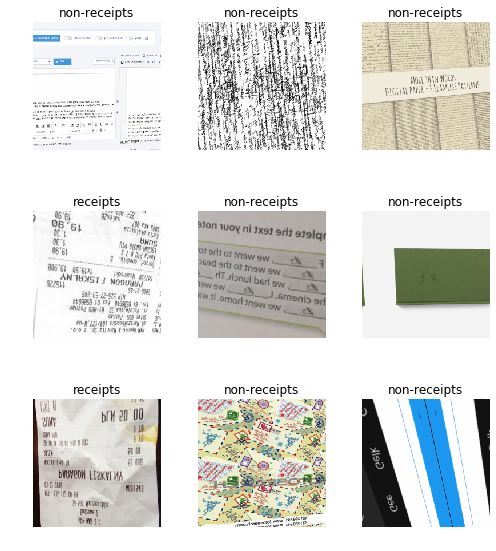

In [12]:
data.show_batch(rows=3, figsize=(7,8))

In [13]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['non-receipts', 'receipts'], 2, 337, 84)

In [14]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:03<00:00, 22.8MB/s]


In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.296975,0.721397,0.321429,00:10
1,1.089224,0.649550,0.214286,00:07
2,0.989793,0.700054,0.238095,00:07
3,0.887631,0.589946,0.250000,00:07


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


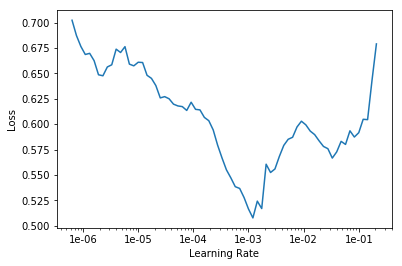

In [19]:
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(4, max_lr=slice(6e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.631512,2.928111,0.559524,00:08
1,0.611163,8.049047,0.773810,00:08
2,0.520976,1.977310,0.297619,00:08
3,0.426277,0.717839,0.107143,00:08


In [0]:
learn.save('stage-2')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

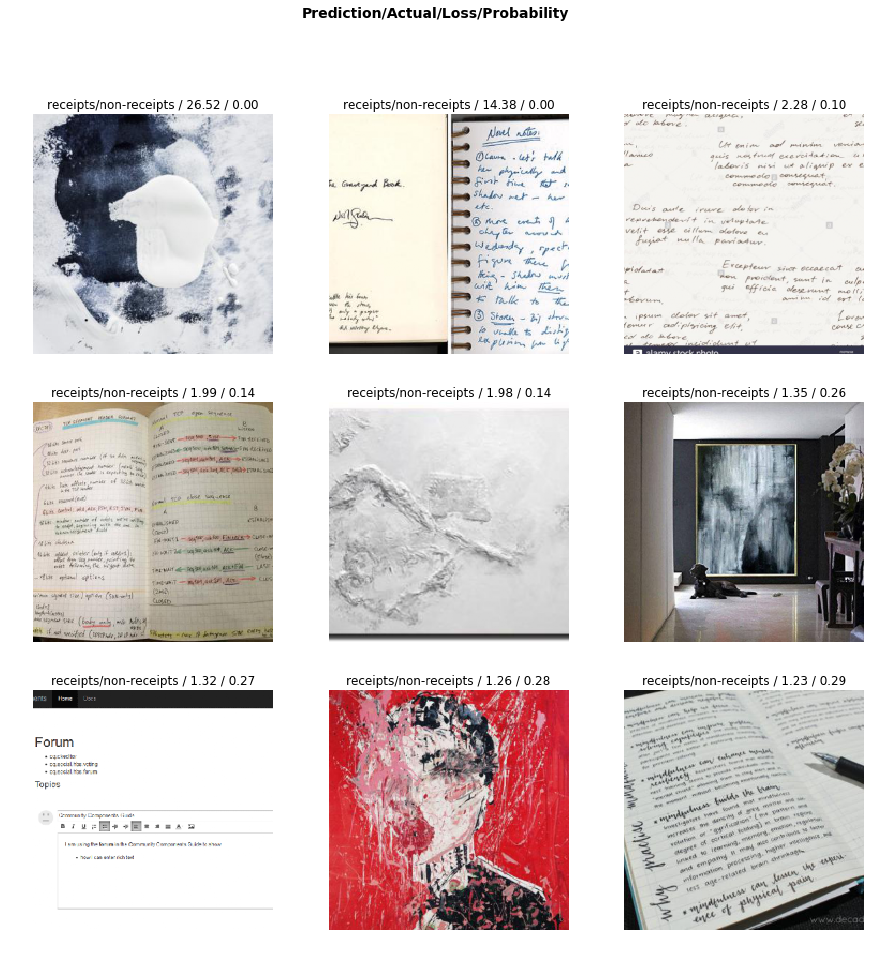

In [23]:
interp.plot_top_losses(9, figsize=(15,15))


In [0]:
learn.export()